In [1]:
library(Seurat)
library(Signac)
library(CellChat)
library(patchwork)
library(argparse)
source("/tscc/projects/ps-epigen/users/kdang/eye_final/source_FunFig.R")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:Seurat’:

    components


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [2]:
sobj<- readRDS("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/SCT/250303_humanAT2_organoids_NA.RDS")

In [3]:
sobj

An object of class Seurat 
44696 features across 16578 samples within 2 assays 
Active assay: SCT (21631 features, 5000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap.rna

In [4]:
DefaultAssay(sobj) <- "SCT"

In [5]:
sobj

An object of class Seurat 
44696 features across 16578 samples within 2 assays 
Active assay: SCT (21631 features, 5000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap.rna

In [6]:
demux_lib3 <- read.table("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/Demux/250317_AT2_organoid_ZO/popscle_out/JB_1466_1_2.best", header = TRUE, sep = "\t", stringsAsFactors = FALSE)


In [7]:
head(demux_lib3)

,INT_ID,BARCODE,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,BEST.LLK,NEXT.GUESS,NEXT.LLK,DIFF.LLK.BEST.NEXT,BEST.POSTERIOR,SNG.POSTERIOR,SNG.BEST.GUESS,SNG.BEST.LLK,SNG.NEXT.GUESS,SNG.NEXT.LLK,SNG.ONLY.POSTERIOR,DBL.BEST.GUESS,DBL.BEST.LLK,DIFF.LLK.SNG.DBL
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,0,.,7430,36605,DBL,"0_0_2_ZBC2,0_0_3_ZBC3,0.50",-4079.04,"0_0_3_ZBC3,0_0_2_ZBC2,0.50",-4079.04,0,0.0,1.00,0_0_3_ZBC3,-6168.48,0_0_2_ZBC2,-8007.10,0.00000,"0_0_2_ZBC2,0_0_3_ZBC3,0.50",-4079.04,-2089.44
2,3,AAACCAAAGAAGCTAA-1,1,1,AMB,"0_0_1_ZBC1,0_0_1_ZBC1,0.00",-0.01,"0_0_2_ZBC2,0_0_2_ZBC2,0.00",-0.01,0,-3.1,0.76,0_0_1_ZBC1,-0.01,0_0_2_ZBC2,-0.01,0.05666,"0_0_1_ZBC1,0_0_2_ZBC2,0.50",-0.01,0.00
3,18,AAACCAAAGCATCAAT-1,1,1,AMB,"0_0_5_ZBl2,0_0_5_ZBl2,0.00",-0.06,"0_0_6_ZBl3,0_0_6_ZBl3,0.00",-0.06,0,-2.9,0.85,0_0_5_ZBl2,-0.06,0_0_6_ZBl3,-0.06,0.06490,"0_0_5_ZBl2,0_0_6_ZBl3,0.50",-0.06,0.00
4,20,AAACCAAAGCATCTCT-1,1,1,AMB,"0_0_1_ZBC1,0_0_1_ZBC1,0.00",-0.01,"0_0_2_ZBC2,0_0_2_ZBC2,0.00",-0.01,0,-3.1,0.76,0_0_1_ZBC1,-0.01,0_0_2_ZBC2,-0.01,0.05666,"0_0_1_ZBC1,0_0_2_ZBC2,0.50",-0.01,0.00
5,24,AAACCAAAGCCACAGT-1,1,1,AMB,"0_0_1_ZBC1,0_0_1_ZBC1,0.00",-0.01,"0_0_3_ZBC3,0_0_3_ZBC3,0.00",-0.01,0,-3.1,0.76,0_0_1_ZBC1,-0.01,0_0_3_ZBC3,-0.01,0.05666,"0_0_1_ZBC1,0_0_3_ZBC3,0.50",-0.01,0.00
6,27,AAACCAAAGCCGCATG-1,1,1,AMB,"0_0_1_ZBC1,0_0_1_ZBC1,0.00",-0.01,"0_0_2_ZBC2,0_0_2_ZBC2,0.00",-0.01,0,-3.1,0.76,0_0_1_ZBC1,-0.01,0_0_2_ZBC2,-0.01,0.05666,"0_0_1_ZBC1,0_0_2_ZBC2,0.50",-0.01,0.00


In [8]:
table(demux_lib3$DROPLET.TYPE)


  AMB   DBL   SNG 
35345   449 14505 

In [9]:
rownames(demux_lib3) <- demux_lib3$BARCODE
# Extract barcodes from Seurat object
seurat_barcodes <- rownames(sobj@meta.data)

# Extract barcodes from Demuxlet table
demux_barcodes <- rownames(demux_lib3)

# Print examples of barcodes
cat("Seurat Barcodes (first 10):\n")
print(head(seurat_barcodes, 10))

cat("Demuxlet Barcodes (first 10):\n")
print(head(demux_barcodes, 10))


Seurat Barcodes (first 10):
 [1] "AAACCAAAGCGATCCG-1" "AAACCAAAGGGCTATC-1" "AAACCAAAGTAACGGG-1"
 [4] "AAACCAAAGTTACGCA-1" "AAACCATTCGCGAATC-1" "AAACCATTCGCGACAT-1"
 [7] "AAACCATTCGCGTGAT-1" "AAACCATTCGTGCTCC-1" "AAACCCGCAAGCACAT-1"
[10] "AAACCCGCACCTACGT-1"
Demuxlet Barcodes (first 10):
 [1] "."                  "AAACCAAAGAAGCTAA-1" "AAACCAAAGCATCAAT-1"
 [4] "AAACCAAAGCATCTCT-1" "AAACCAAAGCCACAGT-1" "AAACCAAAGCCGCATG-1"
 [7] "AAACCAAAGCGATCCG-1" "AAACCAAAGCTAGTAT-1" "AAACCAAAGGAATGAC-1"
[10] "AAACCAAAGGAGCTTC-1"


In [10]:
# Find barcodes in Demuxlet but not in Seurat
demux_not_in_seurat <- setdiff(demux_barcodes, seurat_barcodes)

# Find barcodes in Seurat but not in Demuxlet
seurat_not_in_demux <- setdiff(seurat_barcodes, demux_barcodes)

# Print differences
cat("Barcodes in Demuxlet but not in Seurat:\n")
print(head(demux_not_in_seurat, 10))  # Show first 10

cat("Barcodes in Seurat but not in Demuxlet:\n")
print(head(seurat_not_in_demux, 10))  # Show first 10

# Count differences
cat("Number of barcodes in Demuxlet but not in Seurat:", length(demux_not_in_seurat), "\n")
cat("Number of barcodes in Seurat but not in Demuxlet:", length(seurat_not_in_demux), "\n")

Barcodes in Demuxlet but not in Seurat:
 [1] "."                  "AAACCAAAGAAGCTAA-1" "AAACCAAAGCATCAAT-1"
 [4] "AAACCAAAGCATCTCT-1" "AAACCAAAGCCACAGT-1" "AAACCAAAGCCGCATG-1"
 [7] "AAACCAAAGCTAGTAT-1" "AAACCAAAGGAATGAC-1" "AAACCAAAGGAGCTTC-1"
[10] "AAACCAAAGGGTACGA-1"
Barcodes in Seurat but not in Demuxlet:
 [1] "AAACGGGTCTAAGCAT-1" "ACAGCGAAGGTCATCA-1" "ACATGAGGTAGGCGAT-1"
 [4] "ACCACAATCGTGCCAG-1" "CAAGGAACAAATTCCT-1" "CAAGTTTAGCCACGAT-1"
 [7] "CACGGTTAGCAAGGGC-1" "CAGCATATCACATACG-1" "CCGACTAGTAAGCAGC-1"
[10] "CGTCAGTAGGAGGCTA-1"
Number of barcodes in Demuxlet but not in Seurat: 33743 
Number of barcodes in Seurat but not in Demuxlet: 22 


In [11]:
sobj

An object of class Seurat 
44696 features across 16578 samples within 2 assays 
Active assay: SCT (21631 features, 5000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap.rna

In [12]:
# Keep only rows where barcodes match Seurat object
demux_lib3_subset <- demux_lib3[demux_barcodes %in% seurat_barcodes, , drop = FALSE]

# Verify barcode alignment
cat("Final number of matching barcodes:", nrow(demux_lib3_subset), "\n")

Final number of matching barcodes: 16556 


In [13]:
demux_barcodes <-rownames(demux_lib3_subset)

In [14]:
# Find barcodes in Demuxlet but not in Seurat
demux_not_in_seurat <- setdiff(demux_barcodes, seurat_barcodes)

# Find barcodes in Seurat but not in Demuxlet
seurat_not_in_demux <- setdiff(seurat_barcodes, demux_barcodes)

# Print differences
cat("Barcodes in Demuxlet but not in Seurat:\n")
print(head(demux_not_in_seurat, 10))  # Show first 10

cat("Barcodes in Seurat but not in Demuxlet:\n")
print(head(seurat_not_in_demux, 10))  # Show first 10

# Count differences
cat("Number of barcodes in Demuxlet but not in Seurat:", length(demux_not_in_seurat), "\n")
cat("Number of barcodes in Seurat but not in Demuxlet:", length(seurat_not_in_demux), "\n")

Barcodes in Demuxlet but not in Seurat:
character(0)
Barcodes in Seurat but not in Demuxlet:
 [1] "AAACGGGTCTAAGCAT-1" "ACAGCGAAGGTCATCA-1" "ACATGAGGTAGGCGAT-1"
 [4] "ACCACAATCGTGCCAG-1" "CAAGGAACAAATTCCT-1" "CAAGTTTAGCCACGAT-1"
 [7] "CACGGTTAGCAAGGGC-1" "CAGCATATCACATACG-1" "CCGACTAGTAAGCAGC-1"
[10] "CGTCAGTAGGAGGCTA-1"
Number of barcodes in Demuxlet but not in Seurat: 0 
Number of barcodes in Seurat but not in Demuxlet: 22 


In [15]:
new_rownames <- seurat_barcodes[match(rownames(demux_lib3_subset), demux_barcodes)]


In [16]:

# Check for NA values
if (any(is.na(new_rownames))) {
  warning("Some barcodes did not match between demux_lib3_subset and seurat_barcodes")
}

# Assign the new row names
rownames(demux_lib3_subset) <- new_rownames


In [17]:

# Add metadata to Seurat object
sobj <- AddMetaData(sobj, metadata = demux_lib3_subset)

In [18]:
sobj

An object of class Seurat 
44696 features across 16578 samples within 2 assays 
Active assay: SCT (21631 features, 5000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap.rna

In [19]:
options(repr.plot.width=30, repr.plot.height=8)

pdf(file = "/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/SCT/nFeature_nCount_RNA_percent.mt.pdf", width = 30, height = 8)
options(repr.plot.width=30, repr.plot.height=8)
# Visualize QC metrics as a violin plot
VlnPlot(sobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
dev.off()

pdf 
  2

In [20]:
options(repr.plot.width=8, repr.plot.height=8)
pdf(file = "/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/SCT/umap_rna.pdf")
DimPlot(sobj, reduction = "umap.rna")
dev.off()

pdf 
  2

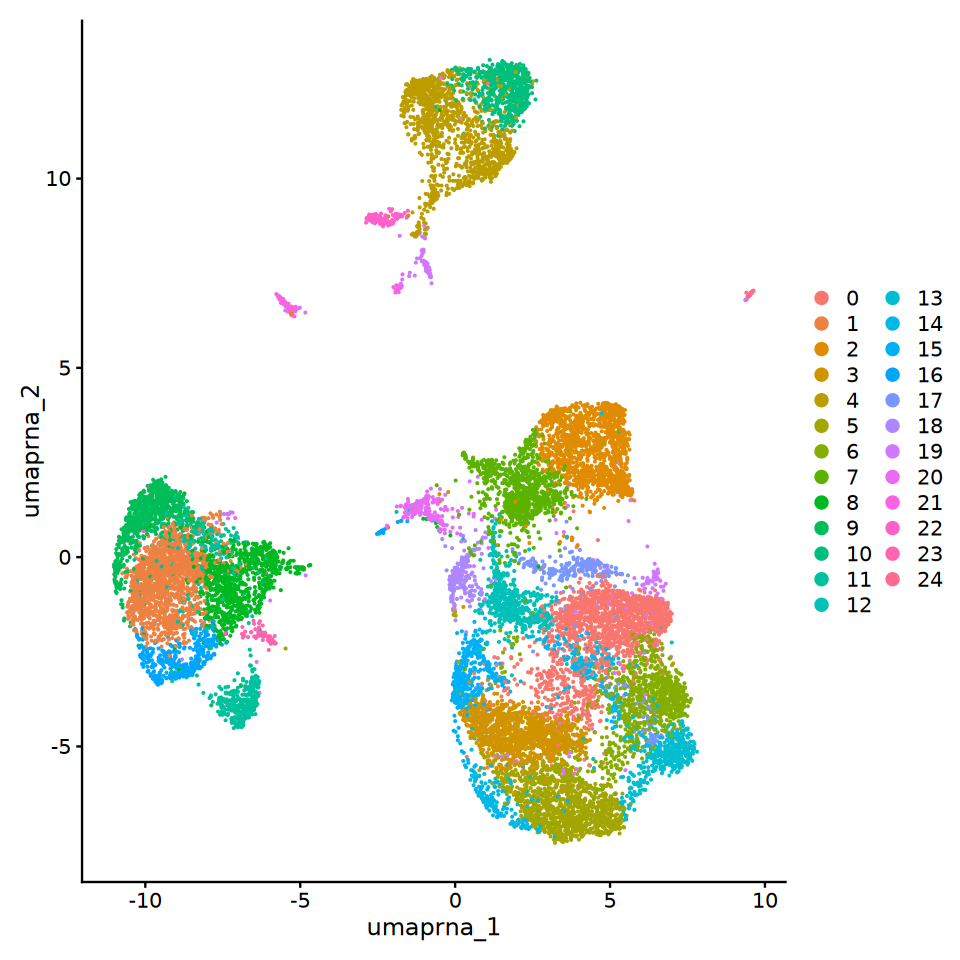

In [21]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(sobj, reduction = "umap.rna")

In [ ]:
unique(sobj@meta.data)

In [ ]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
sobj.markers <- FindAllMarkers(sobj, only.pos = TRUE)
sobj.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

In [ ]:
write.csv(sobj.markers, "/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/FindAllMarkers.csv")

In [ ]:
# Extract the base file name without extension
base_name <- "250225_humanAT2_organoids/data/FindAllMarkers"

# Write the data to a CSV file
write.csv(sobj.markers, paste0("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/", base_name, ".csv"))

# Write the data to an HTML file using knitr::kable
library(knitr)
html_output <- paste0("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/", base_name, ".html")
kable(sobj.markers, format = "html") %>% 
  cat(file = html_output)

  # Write the data to a plain text file (tab-delimited)
text_output <- paste0("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/", base_name, ".txt")
write.table(sobj.markers, file = text_output, sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)


In [ ]:
table(sobj$seurat_clusters)

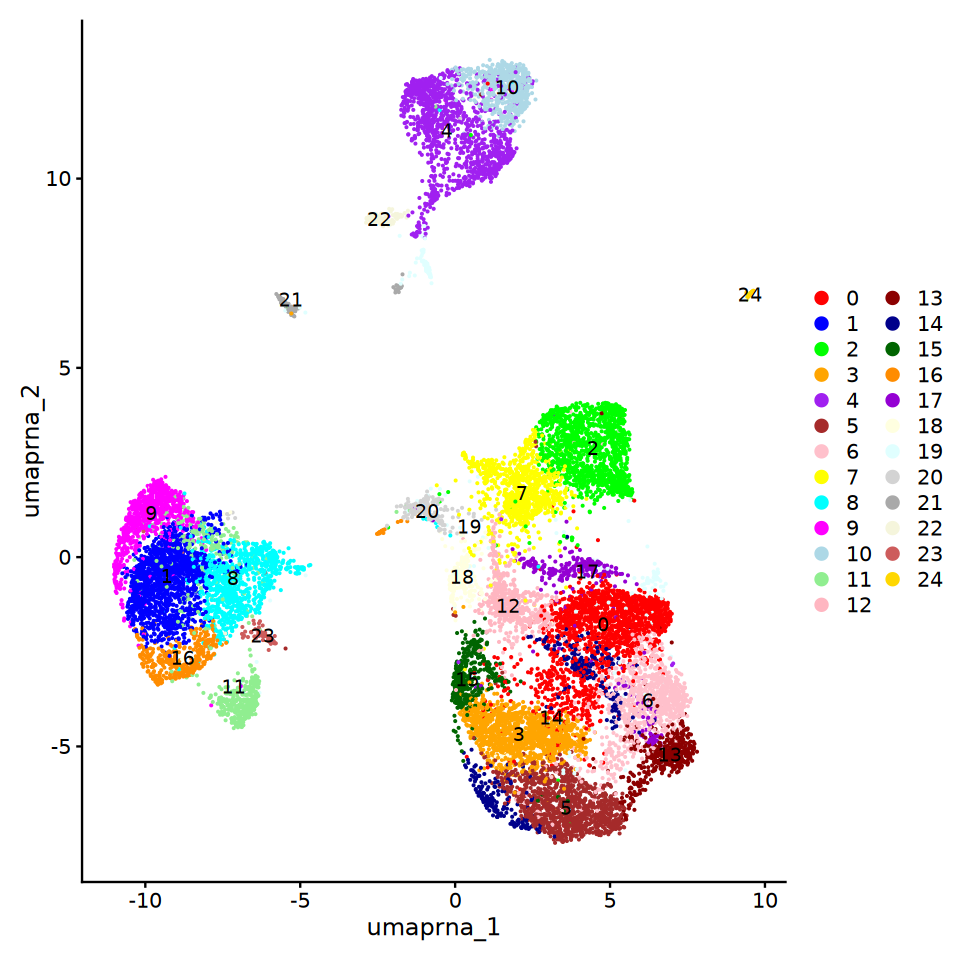

In [27]:
colors_24 <- c(
  "red", "blue", "green", "orange", "purple", "brown", "pink", "yellow", "cyan", "magenta",
  "lightblue", "lightgreen", "lightpink", "darkred", "darkblue", "darkgreen", "darkorange", "darkviolet",
  "lightyellow", "lightcyan", "lightgrey", "darkgrey", "beige", "indianred", "gold"
)

options(repr.plot.width=8, repr.plot.height=8)
DimPlot(sobj, reduction = "umap.rna", cols = colors_24, label = TRUE)

In [23]:
unique(sobj$orig.ident)

[1] AT2_organ
Levels: AT2_organ

In [24]:
table(sobj$DROPLET.TYPE)


  AMB   DBL   SNG 
 2496   437 13623 

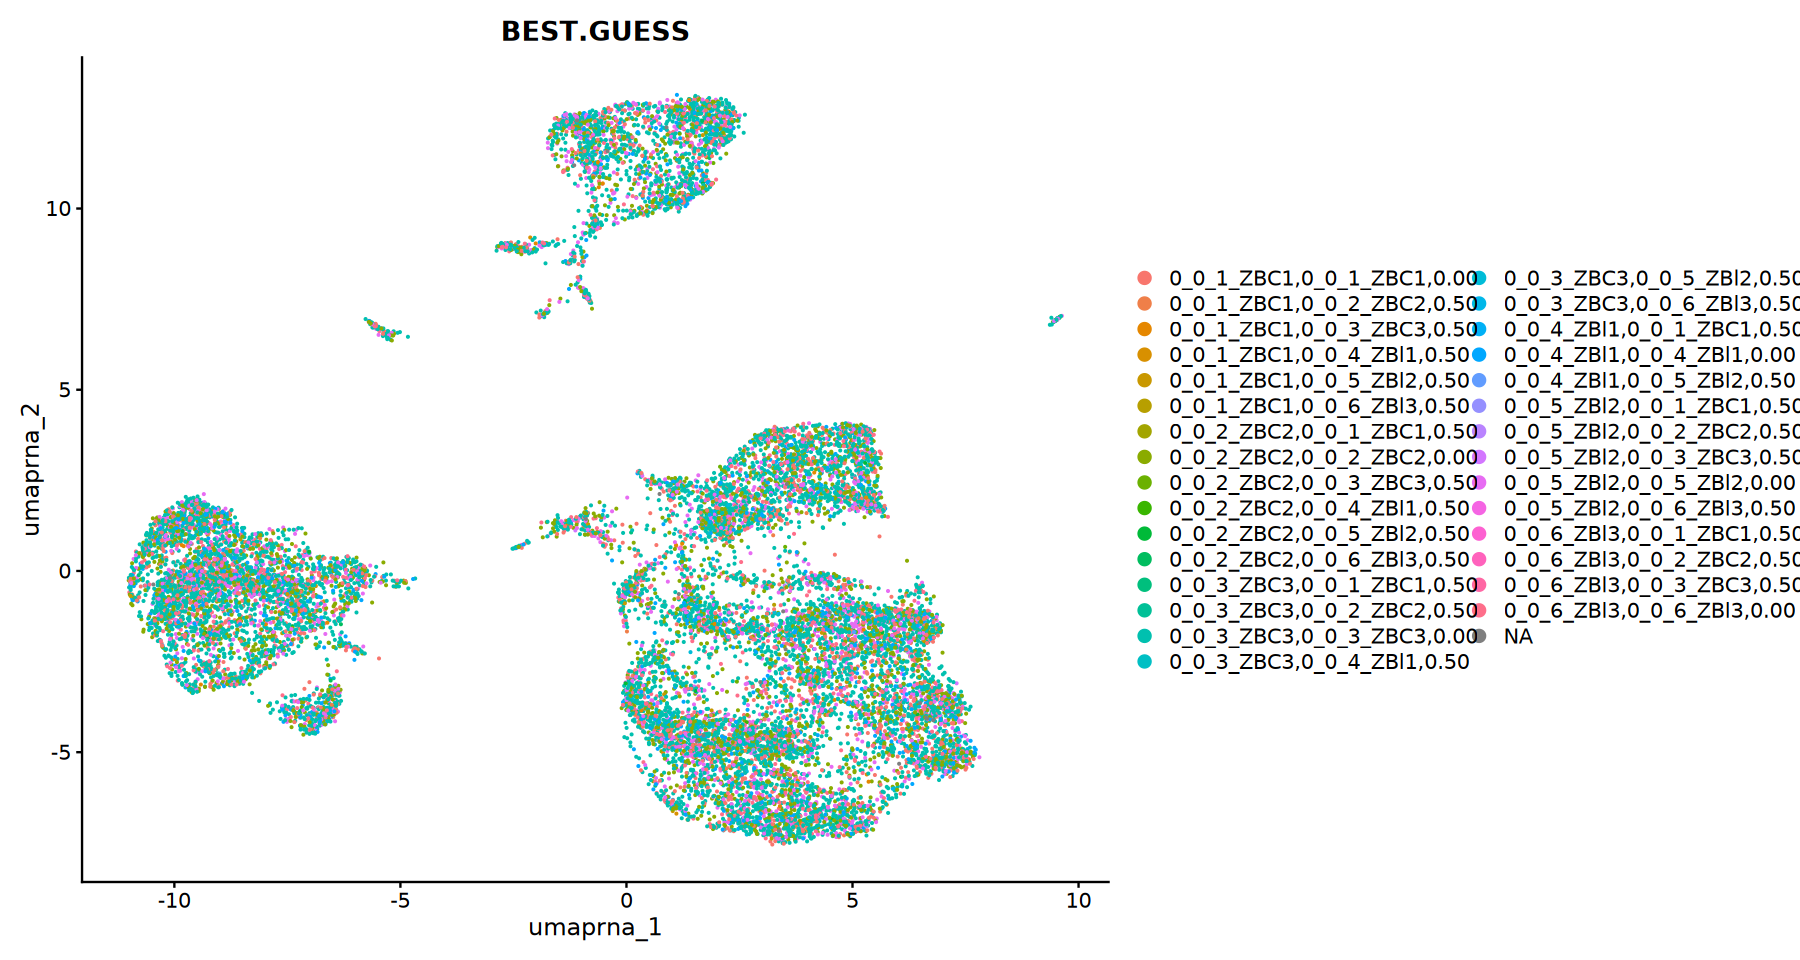

In [26]:
options(repr.plot.width=15, repr.plot.height=8)
DimPlot(sobj, reduction = "umap.rna", group.by = "BEST.GUESS")

In [ ]:
DimPlot(sobj, reduction = "umap.rna", )

In [28]:
setwd("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/rds_objs/")


In [29]:
saveRDS(sobj,"JB_1466_w_demux_data.RDS")